In [1]:
import plumed
from matplotlib import pyplot as plt
import numpy as np
import MDAnalysis as md
import itertools
#import pyemma
import pandas as pd
import string

import warnings
warnings.filterwarnings('ignore')

In [27]:
# Folding free energy between alpha > 4 and alpha < 1
temperature = 310
kbt = 8.314 * temperature / 1000
fes_1d_alpha = plumed.read_as_pandas('hist-fes1/fes-alpha_10.dat')

fes_folded = -kbt*np.logaddexp.reduce(-1/kbt*fes_1d_alpha[fes_1d_alpha['alpha']>4]['file.free'])
fes_unfolded = -kbt*np.logaddexp.reduce(-1/kbt*fes_1d_alpha[fes_1d_alpha['alpha']<1]['file.free'])

fes_folded-fes_unfolded

12.37866476528088

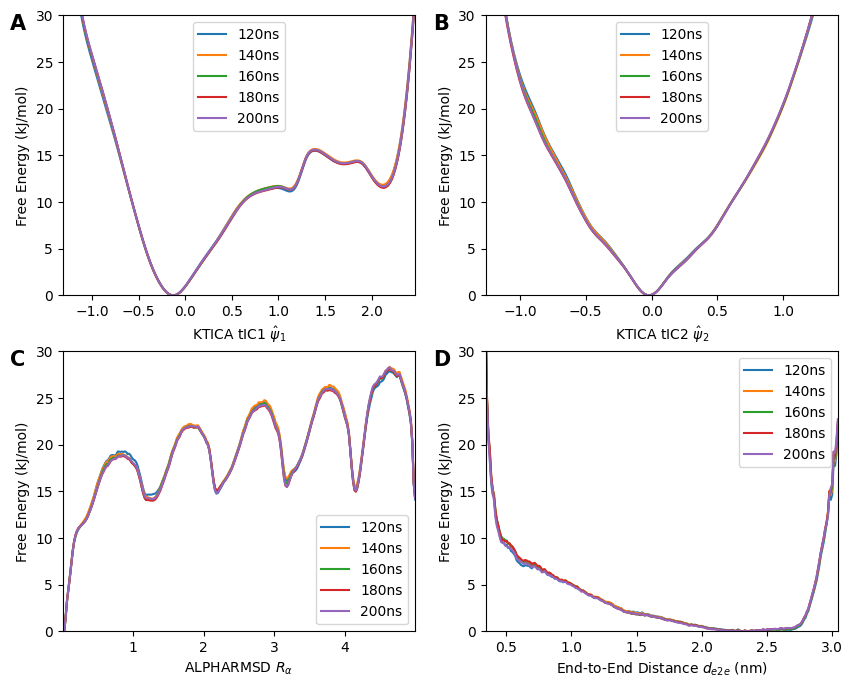

In [2]:
### 1D FES
index_x = -0.15
index_y = 0.95

# 1. FES vs time
fig,ax = plt.subplots(nrows=2,ncols=2,sharex=False,sharey=False,figsize=(10,8))

fes_1d = {}
colvar_name = ['tica0','tica1','alpha','e2e']
xlabel_name = [r'KTICA tIC1 $\hat \psi_1$',r'KTICA tIC2 $\hat \psi_2$',r'ALPHARMSD $R_\alpha$',r'End-to-End Distance $d_{e2e}$ (nm)']
from_i = 4

cv = 'tica0'
j = 0

# Plot Timeseries
fes_1d[cv] = [0] * 10
for i in range(0,10):
    fes_1d[cv][i] = plumed.read_as_pandas('hist-fes1/fes-{cv}_{i}.dat'.format(cv=cv,i=i+1))
    if i > from_i:
        ax[0,0].plot(fes_1d[cv][i][cv],fes_1d[cv][i]['file.free'],ms=3,label='{time}ns'.format(time=(i+1)*20))
ax[0,0].set_xlim(fes_1d[cv][i][cv].min(),fes_1d[cv][i][cv].max())
ax[0,0].set_ylim(0,30)
ax[0,0].set_xlabel(xlabel_name[j])
ax[0,0].set_ylabel('Free Energy (kJ/mol)')
ax[0,0].legend()

cv = 'tica1'
j = 1

# Plot Timeseries
fes_1d[cv] = [0] * 10
for i in range(0,10):
    fes_1d[cv][i] = plumed.read_as_pandas('hist-fes1/fes-{cv}_{i}.dat'.format(cv=cv,i=i+1))
    if i > from_i:
        ax[0,1].plot(fes_1d[cv][i][cv],fes_1d[cv][i]['file.free'],ms=3,label='{time}ns'.format(time=(i+1)*20))
ax[0,1].set_xlim(fes_1d[cv][i][cv].min(),fes_1d[cv][i][cv].max())
ax[0,1].set_ylim(0,30)
ax[0,1].set_xlabel(xlabel_name[j])
ax[0,1].set_ylabel('Free Energy (kJ/mol)')
ax[0,1].legend()

cv = 'alpha'
j = 2

# Plot reference
#fes_1d_ref = plumed.read_as_pandas('hist-fes0/fes-{cv}.dat'.format(cv=cv))
#ax[1,0].plot(fes_1d_ref[cv],fes_1d_ref['file.free'],ms=3,label='Reference')

# Plot Timeseries
fes_1d[cv] = [0] * 10
for i in range(0,10):
    fes_1d[cv][i] = plumed.read_as_pandas('hist-fes1/fes-{cv}_{i}.dat'.format(cv=cv,i=i+1))
    if i > from_i:
        ax[1,0].plot(fes_1d[cv][i][cv],fes_1d[cv][i]['file.free'],ms=3,label='{time}ns'.format(time=(i+1)*20))
ax[1,0].set_xlim(fes_1d[cv][i][cv].min(),fes_1d[cv][i][cv].max())
ax[1,0].set_ylim(0,30)
ax[1,0].set_xlabel(xlabel_name[j])
ax[1,0].set_ylabel('Free Energy (kJ/mol)')
ax[1,0].legend()

cv = 'e2e'
j = 3

# Plot reference
#fes_1d_ref = plumed.read_as_pandas('hist-fes0/fes-{cv}.dat'.format(cv=cv))
#ax[1,1].plot(fes_1d_ref[cv],fes_1d_ref['file.free'],ms=3,label='Reference')

# Plot Timeseries
fes_1d[cv] = [0] * 10
for i in range(0,10):
    fes_1d[cv][i] = plumed.read_as_pandas('hist-fes1/fes-{cv}_{i}.dat'.format(cv=cv,i=i+1))
    if i > from_i:
        ax[1,1].plot(fes_1d[cv][i][cv],fes_1d[cv][i]['file.free'],ms=3,label='{time}ns'.format(time=(i+1)*20))
ax[1,1].set_xlim(fes_1d[cv][i][cv].min(),fes_1d[cv][i][cv].max())
ax[1,1].set_ylim(0,30)
ax[1,1].set_xlabel(xlabel_name[j])
ax[1,1].set_ylabel('Free Energy (kJ/mol)')
ax[1,1].legend()

ax[0,0].text(index_x, index_y, string.ascii_uppercase[0],transform=ax[0,0].transAxes, size=15, weight='bold')
ax[0,1].text(index_x, index_y, string.ascii_uppercase[1],transform=ax[0,1].transAxes, size=15, weight='bold')
ax[1,0].text(index_x, index_y, string.ascii_uppercase[2],transform=ax[1,0].transAxes, size=15, weight='bold')
ax[1,1].text(index_x, index_y, string.ascii_uppercase[3],transform=ax[1,1].transAxes, size=15, weight='bold')

plt.savefig('../../figures/opes_fes1d_timeseries.png',dpi=600,bbox_inches='tight')
plt.show()

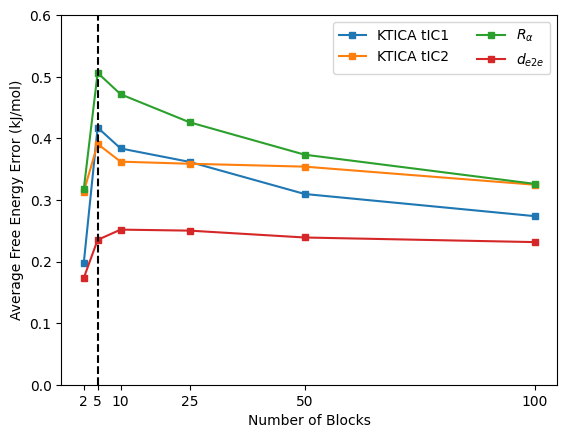

In [3]:
# 2. Block Analysis
label_name = ['KTICA tIC1','KTICA tIC2',r'$R_\alpha$',r'$d_{e2e}$']
no_blocks = np.array([2,5,10,25,50,100])
error_average = [0] * len(colvar_name)
for i,cv in enumerate(colvar_name):
    error_average[i] = np.loadtxt('log{cv}_1'.format(cv=cv))[:-5]
    plt.plot(no_blocks,error_average[i],ms=5,marker='s',label=label_name[i])
plt.xlabel('Number of Blocks')
plt.axvline(5,color='black',linestyle='dashed')
plt.xticks(no_blocks)
plt.ylim(0,0.6)
plt.ylabel('Average Free Energy Error (kJ/mol)')
plt.legend(ncols=2)
plt.savefig('../../figures/Block_Analysis.png',dpi=600,bbox_inches='tight')
plt.show()

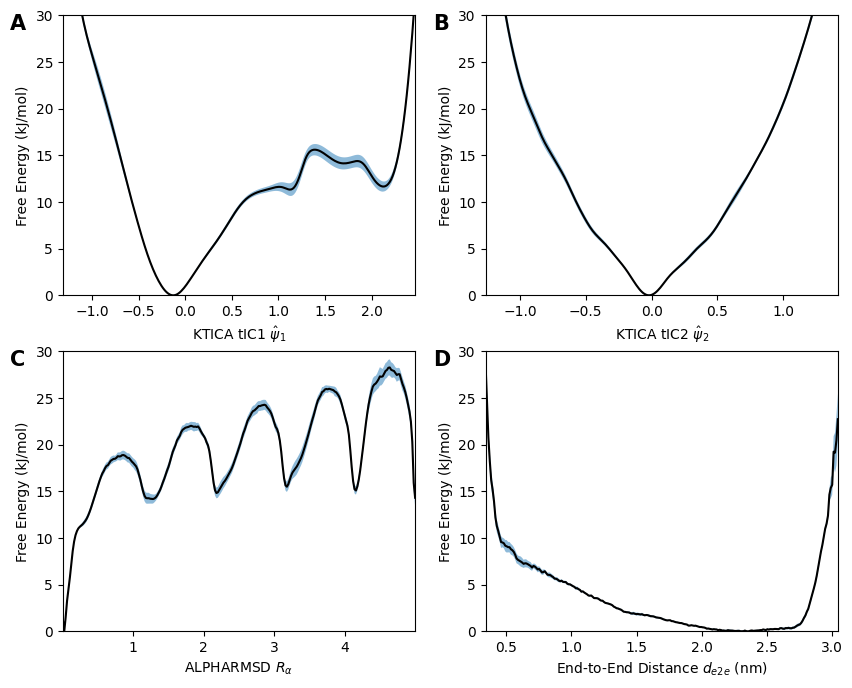

In [4]:
# 3. Final 1d free energy with error bars:
fig,ax = plt.subplots(nrows=2,ncols=2,sharex=False,sharey=False,figsize=(10,8))
index_x = -0.15
index_y = 0.95

errorbar = [0] * len(colvar_name)
block_no = 5

i=0
cv='tica0'
errorbar[i] = np.loadtxt('1_error/err_fes_{cv}_{block_no}'.format(cv=cv,block_no=block_no))
x = fes_1d[cv][9][cv]
y = fes_1d[cv][9]['file.free']
ax[0,0].plot(x,y,'k-',ms=3)
ax[0,0].fill_between(x,y-errorbar[i],y+errorbar[i],alpha=0.5)
ax[0,0].set_xlim(fes_1d[cv][9][cv].min(),fes_1d[cv][9][cv].max())
ax[0,0].set_ylim(0,30)
ax[0,0].set_xlabel(xlabel_name[i])
ax[0,0].set_ylabel('Free Energy (kJ/mol)')

i=1
cv='tica1'
errorbar[i] = np.loadtxt('1_error/err_fes_{cv}_{block_no}'.format(cv=cv,block_no=block_no))
x = fes_1d[cv][9][cv]
y = fes_1d[cv][9]['file.free']
ax[0,1].plot(x,y,'k-',ms=3)
ax[0,1].fill_between(x,y-errorbar[i],y+errorbar[i],alpha=0.5)
ax[0,1].set_xlim(fes_1d[cv][9][cv].min(),fes_1d[cv][9][cv].max())
ax[0,1].set_ylim(0,30)
ax[0,1].set_xlabel(xlabel_name[i])
ax[0,1].set_ylabel('Free Energy (kJ/mol)')

i=2
cv='alpha'
errorbar[i] = np.loadtxt('1_error/err_fes_{cv}_{block_no}'.format(cv=cv,block_no=block_no))
x = fes_1d[cv][9][cv]
y = fes_1d[cv][9]['file.free']
ax[1,0].plot(x,y,'k-',ms=3)
ax[1,0].fill_between(x,y-errorbar[i],y+errorbar[i],alpha=0.5)
ax[1,0].set_xlim(fes_1d[cv][9][cv].min(),fes_1d[cv][9][cv].max())
ax[1,0].set_ylim(0,30)
ax[1,0].set_xlabel(xlabel_name[i])
ax[1,0].set_ylabel('Free Energy (kJ/mol)')

i=3
cv='e2e'
errorbar[i] = np.loadtxt('1_error/err_fes_{cv}_{block_no}'.format(cv=cv,block_no=block_no))
x = fes_1d[cv][9][cv]
y = fes_1d[cv][9]['file.free']
ax[1,1].plot(x,y,'k-',ms=3)
ax[1,1].fill_between(x,y-errorbar[i],y+errorbar[i],alpha=0.5)
ax[1,1].set_xlim(fes_1d[cv][9][cv].min(),fes_1d[cv][9][cv].max())
ax[1,1].set_ylim(0,30)
ax[1,1].set_xlabel(xlabel_name[i])
ax[1,1].set_ylabel('Free Energy (kJ/mol)')

ax[0,0].text(index_x, index_y, string.ascii_uppercase[0],transform=ax[0,0].transAxes, size=15, weight='bold')
ax[0,1].text(index_x, index_y, string.ascii_uppercase[1],transform=ax[0,1].transAxes, size=15, weight='bold')
ax[1,0].text(index_x, index_y, string.ascii_uppercase[2],transform=ax[1,0].transAxes, size=15, weight='bold')
ax[1,1].text(index_x, index_y, string.ascii_uppercase[3],transform=ax[1,1].transAxes, size=15, weight='bold')

#plt.savefig('../../figures/FES_final_with_errorbars_all.png',dpi=600,bbox_inches='tight')

plt.show()

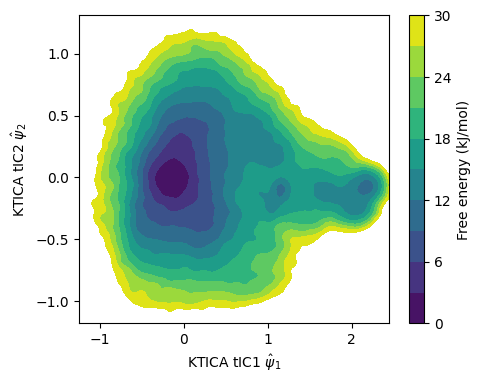

In [6]:
# 2D FES in KTICA space
xlabel_name1 = [r'KTICA tIC1 $\hat \psi_1$','End-to-end Distance $d_{e2e}$ (nm)']
xlabel_name2 = [r'KTICA tIC2 $\hat \psi_2$', r'AlphaRMSD $R_{\alpha}$']

index_x = -0.15
index_y = 0.95

vmax = 30

levels = np.linspace(0,vmax,11)

fig,ax = plt.subplots(figsize=(5,4))

cv1 = 'tica0'
cv2 = 'tica1'

fes_2d = plumed.read_as_pandas('hist-fes1/fes2d-{cv1}-{cv2}.dat'.format(cv1=cv1,cv2=cv2))
nbins = int(np.sqrt(len(fes_2d.iloc[:,2])))
x = np.linspace(fes_2d[cv1].min(), fes_2d[cv1].max(), nbins)
y = np.linspace(fes_2d[cv2].min(), fes_2d[cv2].max(), nbins)
X, Y = np.meshgrid(x, y)
Z = fes_2d.iloc[:,2].to_numpy().reshape(nbins,nbins).T
contourf = ax.contourf(X, Y, Z,vmax=vmax,color='black',levels=levels)
cb = fig.colorbar(contourf, ax=ax, label='Free energy (kJ/mol)')
ax.set_aspect('auto')
ax.set_xlabel(xlabel_name1[0])
ax.set_ylabel(xlabel_name2[0])
#ax.plot(1.65,-0.1,'x',color='red')
plt.savefig('../../figures/FES_2d_final.png',dpi=600,bbox_inches='tight')
plt.show()

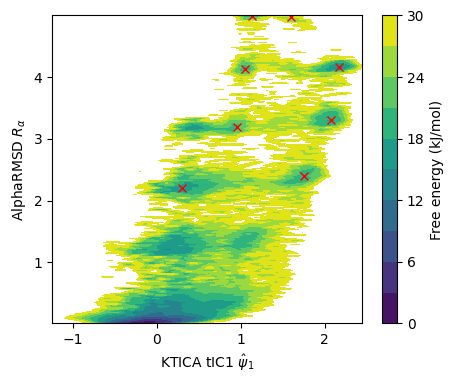

In [4]:
# 2D FES in KTICA space
xlabel_name = r'KTICA tIC1 $\hat \psi_1$'
ylabel_name = r'AlphaRMSD $R_{\alpha}$'

basin_loc_x = [2.17,1.05,1.14,1.6,2.07,0.95,1.75,0.3]
basin_loc_y = [4.17,4.13,4.99,4.97,3.3,3.2,2.4,2.2]

index_x = -0.15
index_y = 0.95

vmax = 30

levels = np.linspace(0,vmax,11)

fig,ax = plt.subplots(figsize=(5,4))

cv1 = 'tica0'
cv2 = 'alpha'

fes_2d = plumed.read_as_pandas('hist-fes1/fes2d-{cv1}-{cv2}.dat'.format(cv1=cv1,cv2=cv2))
nbins = int(np.sqrt(len(fes_2d.iloc[:,2])))
x = np.linspace(fes_2d[cv1].min(), fes_2d[cv1].max(), nbins)
y = np.linspace(fes_2d[cv2].min(), fes_2d[cv2].max(), nbins)
X, Y = np.meshgrid(x, y)
Z = fes_2d.iloc[:,2].to_numpy().reshape(nbins,nbins).T
contourf = ax.contourf(X, Y, Z,vmax=vmax,color='black',levels=levels)
cb = fig.colorbar(contourf, ax=ax, label='Free energy (kJ/mol)')
ax.set_aspect('auto')
ax.set_xlabel(xlabel_name)
ax.set_ylabel(ylabel_name)
for i in range(len(basin_loc_x)):
    ax.plot(basin_loc_x[i],basin_loc_y[i],'x',color='red')
plt.savefig('../../figures/FES_2d_tic1_alpha.png',dpi=600,bbox_inches='tight')
plt.show()

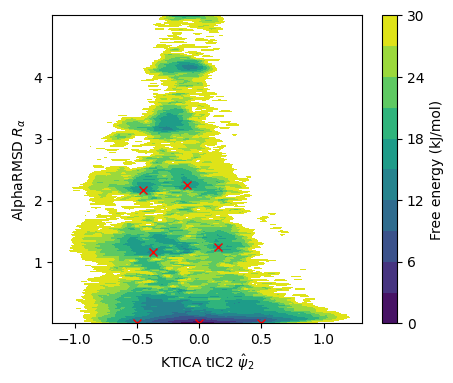

In [2]:
# 2D FES in KTICA space
xlabel_name = r'KTICA tIC2 $\hat \psi_2$'
ylabel_name = r'AlphaRMSD $R_{\alpha}$'

basin_loc_x = [-0.5,0,0.5,1.0,-0.37,0.15,-0.45,-0.1]
basin_loc_y = [0.02,0.02,0.02,0.1,1.17,1.25,2.17,2.25]

index_x = -0.15
index_y = 0.95

vmax = 30

levels = np.linspace(0,vmax,11)

fig,ax = plt.subplots(figsize=(5,4))

cv1 = 'tica1'
cv2 = 'alpha'

fes_2d = plumed.read_as_pandas('hist-fes1/fes2d-{cv1}-{cv2}.dat'.format(cv1=cv1,cv2=cv2))
nbins = int(np.sqrt(len(fes_2d.iloc[:,2])))
x = np.linspace(fes_2d[cv1].min(), fes_2d[cv1].max(), nbins)
y = np.linspace(fes_2d[cv2].min(), fes_2d[cv2].max(), nbins)
X, Y = np.meshgrid(x, y)
Z = fes_2d.iloc[:,2].to_numpy().reshape(nbins,nbins).T
contourf = ax.contourf(X, Y, Z,vmax=vmax,color='black',levels=levels)
cb = fig.colorbar(contourf, ax=ax, label='Free energy (kJ/mol)')
ax.set_aspect('auto')
ax.set_xlabel(xlabel_name)
ax.set_ylabel(ylabel_name)
for i in range(len(basin_loc_x)):
    if i != 3:
        ax.plot(basin_loc_x[i],basin_loc_y[i],'x',color='red')
plt.savefig('../../figures/FES_2d_tic2_alpha.png',dpi=600,bbox_inches='tight')
plt.show()

In [6]:
# Final representative conformation locations on 2D FES

no_replica = 16

# Read topol and trajectories

opes_traj = [0] * no_replica
colvar = []

for i in range(no_replica):
    opes_traj[i] = md.Universe('../0/input.pdb','../{i}/ala10-nopbc.pdb'.format(i=i))
    colvar_i = plumed.read_as_pandas('COLVAR/COLVAR.{i}_stride'.format(i=i))
    colvar.append(colvar_i)
colvar = pd.concat(colvar,ignore_index=True)

In [ ]:
# Find the most stable conformations
fes_2d_tic = plumed.read_as_pandas('hist-fes1/fes2d-tica0-tica1.dat')
fes_2d_tic_stable = fes_2d_tic[fes_2d_tic['file.free'] <= 0.1]

x_0 = (fes_2d_tic_stable['tica0'].max()+fes_2d_tic_stable['tica0'].min())/2
y_0 = (fes_2d_tic_stable['tica1'].max()+fes_2d_tic_stable['tica1'].min())/2

In [157]:
fes_2d_tic_stable['tica0'].max(),fes_2d_tic_stable['tica0'].min(),fes_2d_tic_stable['tica1'].max(),fes_2d_tic_stable['tica1'].min()

(-0.108767, -0.153066, 0.014408, -0.015485)

In [208]:
### Print conformations in each basin for tica0 vs tica1
traj_length = 2001

# the deepest basin
colvar_tmp_1 = colvar[colvar['tica0'] >= fes_2d_tic_stable['tica0'].min()]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica0'] <= fes_2d_tic_stable['tica0'].max()]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['tica1'] >= fes_2d_tic_stable['tica1'].min()]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['tica1'] <= fes_2d_tic_stable['tica1'].max()]

print(len(colvar_tmp_4))
index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('stable-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat stable* > align_stable.pdb
!rm stable*

29


In [209]:
tica_x = [x_0]
tica_y = [y_0]

In [210]:
# Locate all the metastable states

binwidth_x = (fes_2d['tica0'].max()-fes_2d['tica0'].min())/50
binwidth_y = (fes_2d['tica1'].max()-fes_2d['tica1'].min())/50

loc_metastable = fes_2d[fes_2d['file.free']<12][::10]

# Metastable state 1
loc_metastable_1 = loc_metastable[loc_metastable['tica0']>2]
tica_x.append(loc_metastable_1[loc_metastable_1['file.free'] == loc_metastable_1['file.free'].min()]['tica0'].to_numpy()[0])
tica_y.append(loc_metastable_1[loc_metastable_1['file.free'] == loc_metastable_1['file.free'].min()]['tica1'].to_numpy()[0])

# Metastable state 2
loc_metastable_2_tmp = loc_metastable[loc_metastable['tica0']>1]
loc_metastable_2 = loc_metastable_2_tmp[loc_metastable_2_tmp['tica0']<1.5]
tica_x.append(loc_metastable_2[loc_metastable_2['file.free'] == loc_metastable_2['file.free'].min()]['tica0'].to_numpy()[0])
tica_y.append(loc_metastable_2[loc_metastable_2['file.free'] == loc_metastable_2['file.free'].min()]['tica1'].to_numpy()[0])

# Print these metastable states

# metastable 1

j=1
colvar_tmp_1 = colvar[colvar['tica0'] >= (tica_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica0'] <= (tica_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['tica1'] >= (tica_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['tica1'] <= (tica_y[j]+binwidth_y)]

print(len(colvar_tmp_4))
index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('metastable1-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat metastable1* > align_metastable_1.pdb
!rm metastable1*

# metastable 2

j=2
colvar_tmp_1 = colvar[colvar['tica0'] >= (tica_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica0'] <= (tica_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['tica1'] >= (tica_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['tica1'] <= (tica_y[j]+binwidth_y)]

print(len(colvar_tmp_4))
index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('metastable2-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat metastable2* > align_metastable_2.pdb
!rm metastable2*

226
199


In [211]:
# Intermediates: we are also interested intermediate states

binwidth_x = (fes_2d['tica0'].max()-fes_2d['tica0'].min())/100
binwidth_y = (fes_2d['tica1'].max()-fes_2d['tica1'].min())/100

# Intermediate 1
tica_x.append(1.0)
tica_y.append(0.2)

j=3
colvar_tmp_1 = colvar[colvar['tica0'] >= (tica_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica0'] <= (tica_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['tica1'] >= (tica_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['tica1'] <= (tica_y[j]+binwidth_y)]

print(len(colvar_tmp_4))
index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('intermediate1-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat intermediate1* > align_intermediate_1.pdb
!rm intermediate1*

# Intermediate 2
tica_x.append(1.65)
tica_y.append(-0.1)

j=4
colvar_tmp_1 = colvar[colvar['tica0'] >= (tica_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica0'] <= (tica_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['tica1'] >= (tica_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['tica1'] <= (tica_y[j]+binwidth_y)]

print(len(colvar_tmp_4))
index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('intermediate2-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat intermediate2* > align_intermediate_2.pdb
!rm intermediate2*

# Intermediate 3
tica_x.append(1.35)
tica_y.append(0)

j=4
colvar_tmp_1 = colvar[colvar['tica0'] >= (tica_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica0'] <= (tica_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['tica1'] >= (tica_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['tica1'] <= (tica_y[j]+binwidth_y)]

print(len(colvar_tmp_4))
index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('intermediate3-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat intermediate3* > align_intermediate_3.pdb
!rm intermediate3*

30
46
46


In [12]:
# We further extract some conformations based on the 2D tIC1-ALPHARMSD FES
traj_length = 2001

basin_loc_x = [2.17,1.05,1.14,1.6,2.07,0.45,1.75,0.3]
basin_loc_y = [4.17,4.13,4.99,4.97,3.3,3.2,2.4,2.2]

binwidth_x = (fes_2d['tica0'].max()-fes_2d['tica0'].min())/200
binwidth_y = (fes_2d['alpha'].max()-fes_2d['alpha'].min())/200

j=0
colvar_tmp_1 = colvar[colvar['tica0'] >= (basin_loc_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica0'] <= (basin_loc_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['alpha'] >= (basin_loc_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['alpha'] <= (basin_loc_y[j]+binwidth_y)]

print(len(colvar_tmp_4))

index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('alpha_metastable1-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat alpha_metastable1* > alpha_align_metastable_1.pdb
!rm alpha_metastable1*

53


In [44]:
# We further extract some conformations based on the 2D tIC1-ALPHARMSD FES
j=1

colvar_tmp_1 = colvar[colvar['tica0'] >= (basin_loc_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica0'] <= (basin_loc_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['alpha'] >= (basin_loc_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['alpha'] <= (basin_loc_y[j]+binwidth_y)]

print(len(colvar_tmp_4))

index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('alpha_metastable2-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat alpha_metastable2* > alpha_align_metastable_2.pdb
!rm alpha_metastable2*

18


In [45]:
# We further extract some conformations based on the 2D tIC1-ALPHARMSD FES
j=2

colvar_tmp_1 = colvar[colvar['tica0'] >= (basin_loc_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica0'] <= (basin_loc_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['alpha'] >= (basin_loc_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['alpha'] <= (basin_loc_y[j]+binwidth_y)]

print(len(colvar_tmp_4))

index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('alpha_metastable3-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat alpha_metastable3* > alpha_align_metastable_3.pdb
!rm alpha_metastable3*

109


In [46]:
# We further extract some conformations based on the 2D tIC1-ALPHARMSD FES
j=3

colvar_tmp_1 = colvar[colvar['tica0'] >= (basin_loc_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica0'] <= (basin_loc_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['alpha'] >= (basin_loc_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['alpha'] <= (basin_loc_y[j]+binwidth_y)]

print(len(colvar_tmp_4))

index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('alpha_metastable4-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat alpha_metastable4* > alpha_align_metastable_4.pdb
!rm alpha_metastable4*

8


In [47]:
# We further extract some conformations based on the 2D tIC1-ALPHARMSD FES
j=4

colvar_tmp_1 = colvar[colvar['tica0'] >= (basin_loc_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica0'] <= (basin_loc_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['alpha'] >= (basin_loc_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['alpha'] <= (basin_loc_y[j]+binwidth_y)]

print(len(colvar_tmp_4))

index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('alpha_metastable5-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat alpha_metastable5* > alpha_align_metastable_5.pdb
!rm alpha_metastable5*

31


In [11]:
# We further extract some conformations based on the 2D tIC1-ALPHARMSD FES
j=5

colvar_tmp_1 = colvar[colvar['tica0'] >= (basin_loc_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica0'] <= (basin_loc_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['alpha'] >= (basin_loc_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['alpha'] <= (basin_loc_y[j]+binwidth_y)]

print(len(colvar_tmp_4))

index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('alpha_metastable6-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat alpha_metastable6* > alpha_align_metastable_6.pdb
!rm alpha_metastable6*

21


In [49]:
# We further extract some conformations based on the 2D tIC1-ALPHARMSD FES
j=6

colvar_tmp_1 = colvar[colvar['tica0'] >= (basin_loc_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica0'] <= (basin_loc_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['alpha'] >= (basin_loc_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['alpha'] <= (basin_loc_y[j]+binwidth_y)]

print(len(colvar_tmp_4))

index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('alpha_metastable7-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat alpha_metastable7* > alpha_align_metastable_7.pdb
!rm alpha_metastable7*

26


In [50]:
# We further extract some conformations based on the 2D tIC1-ALPHARMSD FES
j=7

colvar_tmp_1 = colvar[colvar['tica0'] >= (basin_loc_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica0'] <= (basin_loc_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['alpha'] >= (basin_loc_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['alpha'] <= (basin_loc_y[j]+binwidth_y)]

print(len(colvar_tmp_4))

index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('alpha_metastable8-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat alpha_metastable8* > alpha_align_metastable_8.pdb
!rm alpha_metastable8*

20


In [22]:
# We further extract some conformations based on the 2D tIC1-ALPHARMSD FES
traj_length = 2001

basin_loc_x = [-0.5,0,0.5,1.0,-0.37,0.15,-0.45,-0.1]
basin_loc_y = [0.02,0.02,0.02,0.1,1.17,1.25,2.17,2.25]

binwidth_x = (fes_2d['tica1'].max()-fes_2d['tica1'].min())/200
binwidth_y = (fes_2d['alpha'].max()-fes_2d['alpha'].min())/200

j=0
colvar_tmp_1 = colvar[colvar['tica1'] >= (basin_loc_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica1'] <= (basin_loc_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['alpha'] >= (basin_loc_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['alpha'] <= (basin_loc_y[j]+binwidth_y)]

print(len(colvar_tmp_4))

index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('tic2_metastable1-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat tic2_metastable1* > tic2_align_metastable_1.pdb
!rm tic2_metastable1*

52


In [23]:
j=1
colvar_tmp_1 = colvar[colvar['tica1'] >= (basin_loc_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica1'] <= (basin_loc_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['alpha'] >= (basin_loc_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['alpha'] <= (basin_loc_y[j]+binwidth_y)]

print(len(colvar_tmp_4))

index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('tic2_metastable2-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat tic2_metastable2* > tic2_align_metastable_2.pdb
!rm tic2_metastable2*

210


In [24]:
j=2
colvar_tmp_1 = colvar[colvar['tica1'] >= (basin_loc_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica1'] <= (basin_loc_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['alpha'] >= (basin_loc_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['alpha'] <= (basin_loc_y[j]+binwidth_y)]

print(len(colvar_tmp_4))

index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('tic2_metastable3-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat tic2_metastable3* > tic2_align_metastable_3.pdb
!rm tic2_metastable3*

40


In [25]:
j=3
colvar_tmp_1 = colvar[colvar['tica1'] >= (basin_loc_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica1'] <= (basin_loc_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['alpha'] >= (basin_loc_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['alpha'] <= (basin_loc_y[j]+binwidth_y)]

print(len(colvar_tmp_4))

index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('tic2_metastable4-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat tic2_metastable4* > tic2_align_metastable_4.pdb
!rm tic2_metastable4*

21


In [26]:
j=4
colvar_tmp_1 = colvar[colvar['tica1'] >= (basin_loc_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica1'] <= (basin_loc_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['alpha'] >= (basin_loc_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['alpha'] <= (basin_loc_y[j]+binwidth_y)]

print(len(colvar_tmp_4))

index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('tic2_metastable5-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat tic2_metastable5* > tic2_align_metastable_5.pdb
!rm tic2_metastable5*

8


In [27]:
j=5
colvar_tmp_1 = colvar[colvar['tica1'] >= (basin_loc_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica1'] <= (basin_loc_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['alpha'] >= (basin_loc_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['alpha'] <= (basin_loc_y[j]+binwidth_y)]

print(len(colvar_tmp_4))

index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('tic2_metastable6-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat tic2_metastable6* > tic2_align_metastable_6.pdb
!rm tic2_metastable6*

12


In [28]:
j=6
colvar_tmp_1 = colvar[colvar['tica1'] >= (basin_loc_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica1'] <= (basin_loc_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['alpha'] >= (basin_loc_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['alpha'] <= (basin_loc_y[j]+binwidth_y)]

print(len(colvar_tmp_4))

index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('tic2_metastable7-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat tic2_metastable7* > tic2_align_metastable_7.pdb
!rm tic2_metastable7*

18


In [29]:
j=7
colvar_tmp_1 = colvar[colvar['tica1'] >= (basin_loc_x[j]-binwidth_x)]
colvar_tmp_2 = colvar_tmp_1[colvar_tmp_1['tica1'] <= (basin_loc_x[j]+binwidth_x)]
colvar_tmp_3 = colvar_tmp_2[colvar_tmp_2['alpha'] >= (basin_loc_y[j]-binwidth_y)]
colvar_tmp_4 = colvar_tmp_3[colvar_tmp_3['alpha'] <= (basin_loc_y[j]+binwidth_y)]

print(len(colvar_tmp_4))

index = colvar_tmp_4.index.to_numpy(dtype=int)
traj_idx = (index//traj_length).astype(int)
frame_idx = (index%traj_length).astype(int)
print_idx = np.concatenate([traj_idx,frame_idx]).reshape(2,-1).T

for i,j in print_idx:
    protein = opes_traj[i].select_atoms('protein')
    protein.write('tic2_metastable8-{i}-{j}.pdb'.format(i=i,j=j), frames=opes_traj[i].trajectory[j:j+1])
!cat tic2_metastable8* > tic2_align_metastable_8.pdb
!rm tic2_metastable8*

18


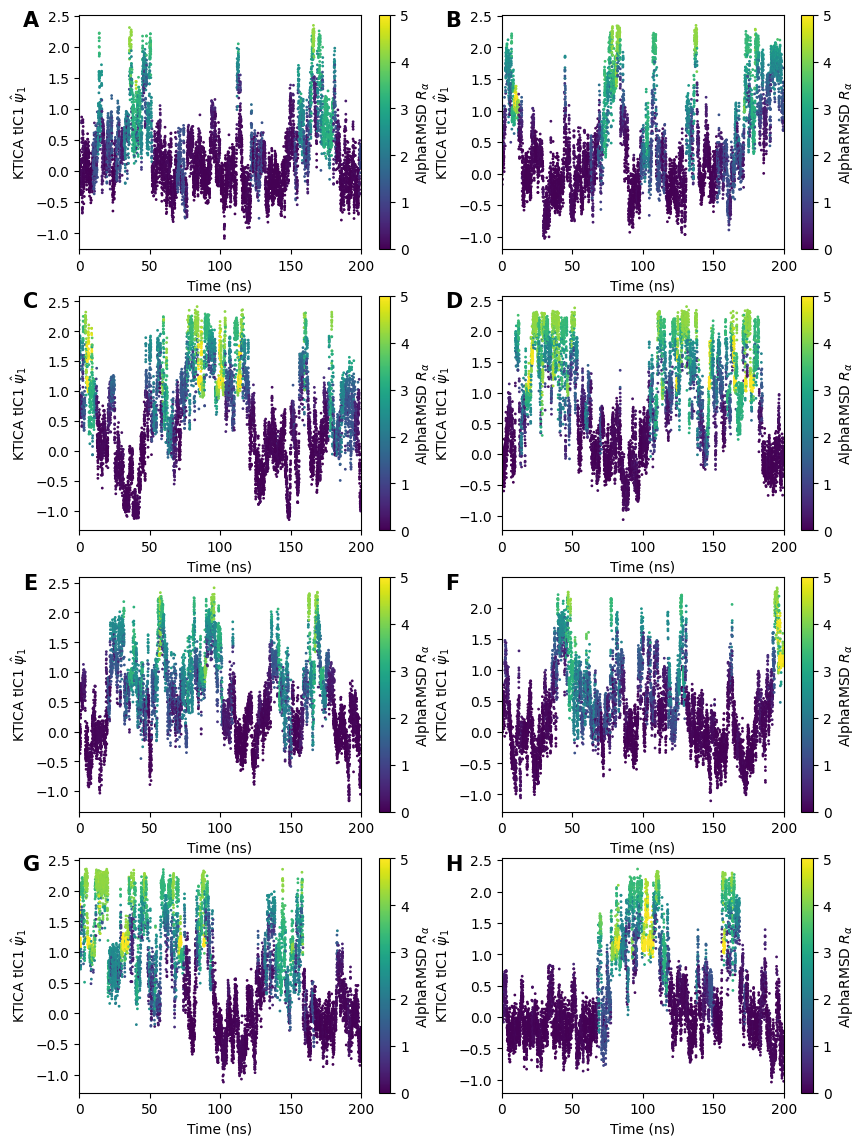

In [7]:
import string

index_x = -0.2
index_y = 0.95
# OPES replica 0-7 timeseries
stride = 20
markersize = 1

colvar = [0] * 16
for i in range(16):
    colvar[i] = plumed.read_as_pandas('../{i}/COLVAR.{i}'.format(i=i))
    colvar[i]['time'] = colvar[i]['time'] / 1000
    
fig,ax = plt.subplots(4,2,figsize=(10,14))

sc1 = ax[0,0].scatter(colvar[0]['time'][::stride],colvar[0]['tica0'][::stride],c=colvar[0]['alpha'][::stride],s=markersize,vmin=0,vmax=5)
sc2 = ax[0,1].scatter(colvar[1]['time'][::stride],colvar[1]['tica0'][::stride],c=colvar[1]['alpha'][::stride],s=markersize,vmin=0,vmax=5)
sc3 = ax[1,0].scatter(colvar[2]['time'][::stride],colvar[2]['tica0'][::stride],c=colvar[2]['alpha'][::stride],s=markersize,vmin=0,vmax=5)
sc4 = ax[1,1].scatter(colvar[3]['time'][::stride],colvar[3]['tica0'][::stride],c=colvar[3]['alpha'][::stride],s=markersize,vmin=0,vmax=5)
sc5 = ax[2,0].scatter(colvar[4]['time'][::stride],colvar[4]['tica0'][::stride],c=colvar[4]['alpha'][::stride],s=markersize,vmin=0,vmax=5)
sc6 = ax[2,1].scatter(colvar[5]['time'][::stride],colvar[5]['tica0'][::stride],c=colvar[5]['alpha'][::stride],s=markersize,vmin=0,vmax=5)
sc7 = ax[3,0].scatter(colvar[6]['time'][::stride],colvar[6]['tica0'][::stride],c=colvar[6]['alpha'][::stride],s=markersize,vmin=0,vmax=5)
sc8 = ax[3,1].scatter(colvar[7]['time'][::stride],colvar[7]['tica0'][::stride],c=colvar[7]['alpha'][::stride],s=markersize,vmin=0,vmax=5)

plt.colorbar(sc1,ax=ax[0,0],label=r'AlphaRMSD $R_\alpha$')
plt.colorbar(sc2,ax=ax[0,1],label=r'AlphaRMSD $R_\alpha$')
plt.colorbar(sc3,ax=ax[1,0],label=r'AlphaRMSD $R_\alpha$')
plt.colorbar(sc4,ax=ax[1,1],label=r'AlphaRMSD $R_\alpha$')
plt.colorbar(sc5,ax=ax[2,0],label=r'AlphaRMSD $R_\alpha$')
plt.colorbar(sc6,ax=ax[2,1],label=r'AlphaRMSD $R_\alpha$')
plt.colorbar(sc7,ax=ax[3,0],label=r'AlphaRMSD $R_\alpha$')
plt.colorbar(sc8,ax=ax[3,1],label=r'AlphaRMSD $R_\alpha$')

ax[0,0].text(index_x, index_y, string.ascii_uppercase[0],transform=ax[0,0].transAxes, size=15, weight='bold')
ax[0,1].text(index_x, index_y, string.ascii_uppercase[1],transform=ax[0,1].transAxes, size=15, weight='bold')
ax[1,0].text(index_x, index_y, string.ascii_uppercase[2],transform=ax[1,0].transAxes, size=15, weight='bold')
ax[1,1].text(index_x, index_y, string.ascii_uppercase[3],transform=ax[1,1].transAxes, size=15, weight='bold')
ax[2,0].text(index_x, index_y, string.ascii_uppercase[4],transform=ax[2,0].transAxes, size=15, weight='bold')
ax[2,1].text(index_x, index_y, string.ascii_uppercase[5],transform=ax[2,1].transAxes, size=15, weight='bold')
ax[3,0].text(index_x, index_y, string.ascii_uppercase[6],transform=ax[3,0].transAxes, size=15, weight='bold')
ax[3,1].text(index_x, index_y, string.ascii_uppercase[7],transform=ax[3,1].transAxes, size=15, weight='bold')

plt.setp(ax,xlim=(0,200),xlabel='Time (ns)',ylabel=r'KTICA tIC1 $\hat \psi_1$')
plt.savefig('../../figures/0-7opes_timeseries.png',dpi=600,bbox_inches='tight')
plt.show()

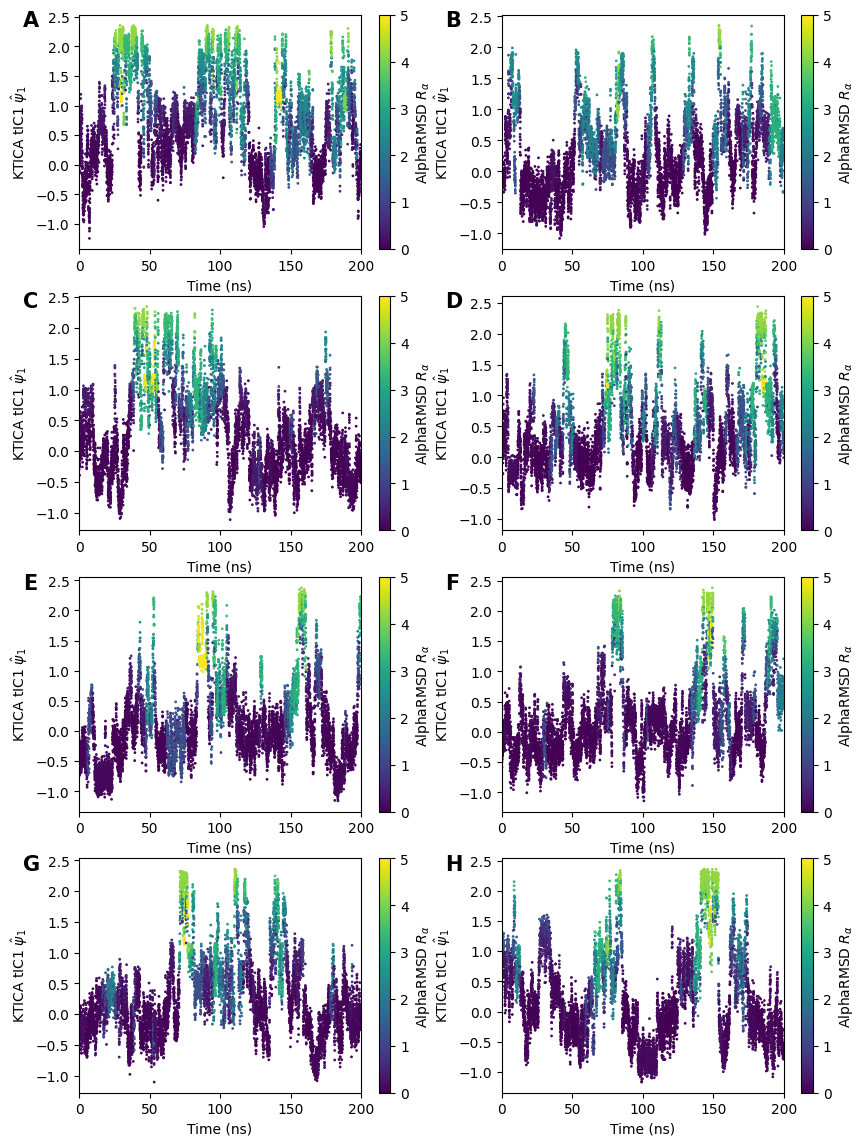

In [8]:
# OPES replica 8-15 timeseries
fig,ax = plt.subplots(4,2,figsize=(10,14))

sc1 = ax[0,0].scatter(colvar[8]['time'][::stride],colvar[8]['tica0'][::stride],c=colvar[8]['alpha'][::stride],s=markersize,vmin=0,vmax=5)
sc2 = ax[0,1].scatter(colvar[9]['time'][::stride],colvar[9]['tica0'][::stride],c=colvar[9]['alpha'][::stride],s=markersize,vmin=0,vmax=5)
sc3 = ax[1,0].scatter(colvar[10]['time'][::stride],colvar[10]['tica0'][::stride],c=colvar[10]['alpha'][::stride],s=markersize,vmin=0,vmax=5)
sc4 = ax[1,1].scatter(colvar[11]['time'][::stride],colvar[11]['tica0'][::stride],c=colvar[11]['alpha'][::stride],s=markersize,vmin=0,vmax=5)
sc5 = ax[2,0].scatter(colvar[12]['time'][::stride],colvar[12]['tica0'][::stride],c=colvar[12]['alpha'][::stride],s=markersize,vmin=0,vmax=5)
sc6 = ax[2,1].scatter(colvar[13]['time'][::stride],colvar[13]['tica0'][::stride],c=colvar[13]['alpha'][::stride],s=markersize,vmin=0,vmax=5)
sc7 = ax[3,0].scatter(colvar[14]['time'][::stride],colvar[14]['tica0'][::stride],c=colvar[14]['alpha'][::stride],s=markersize,vmin=0,vmax=5)
sc8 = ax[3,1].scatter(colvar[15]['time'][::stride],colvar[15]['tica0'][::stride],c=colvar[15]['alpha'][::stride],s=markersize,vmin=0,vmax=5)

plt.colorbar(sc1,ax=ax[0,0],label=r'AlphaRMSD $R_\alpha$')
plt.colorbar(sc2,ax=ax[0,1],label=r'AlphaRMSD $R_\alpha$')
plt.colorbar(sc3,ax=ax[1,0],label=r'AlphaRMSD $R_\alpha$')
plt.colorbar(sc4,ax=ax[1,1],label=r'AlphaRMSD $R_\alpha$')
plt.colorbar(sc5,ax=ax[2,0],label=r'AlphaRMSD $R_\alpha$')
plt.colorbar(sc6,ax=ax[2,1],label=r'AlphaRMSD $R_\alpha$')
plt.colorbar(sc7,ax=ax[3,0],label=r'AlphaRMSD $R_\alpha$')
plt.colorbar(sc8,ax=ax[3,1],label=r'AlphaRMSD $R_\alpha$')

ax[0,0].text(index_x, index_y, string.ascii_uppercase[0],transform=ax[0,0].transAxes, size=15, weight='bold')
ax[0,1].text(index_x, index_y, string.ascii_uppercase[1],transform=ax[0,1].transAxes, size=15, weight='bold')
ax[1,0].text(index_x, index_y, string.ascii_uppercase[2],transform=ax[1,0].transAxes, size=15, weight='bold')
ax[1,1].text(index_x, index_y, string.ascii_uppercase[3],transform=ax[1,1].transAxes, size=15, weight='bold')
ax[2,0].text(index_x, index_y, string.ascii_uppercase[4],transform=ax[2,0].transAxes, size=15, weight='bold')
ax[2,1].text(index_x, index_y, string.ascii_uppercase[5],transform=ax[2,1].transAxes, size=15, weight='bold')
ax[3,0].text(index_x, index_y, string.ascii_uppercase[6],transform=ax[3,0].transAxes, size=15, weight='bold')
ax[3,1].text(index_x, index_y, string.ascii_uppercase[7],transform=ax[3,1].transAxes, size=15, weight='bold')

plt.setp(ax,xlim=(0,200),xlabel='Time (ns)',ylabel=r'KTICA tIC1 $\hat \psi_1$')
plt.savefig('../../figures/8-15opes_timeseries.png',dpi=600,bbox_inches='tight')
plt.show()